In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
     

In [3]:
# Load the dataset
diwali_data=pd.read_csv("C:/Users/dell4/Downloads/Diwali Sales Data.csv", encoding='latin1')
# Display the first few rows of the dataset to understand its structure
diwali_data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
diwali_data.shape

(11251, 15)

In [11]:
diwali_data.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [13]:
# Check for missing values and data types in the dataset
diwali_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [15]:
# Check for unique values and missing data in each column
diwali_data.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [17]:
# Drop the 'Status' and 'unnamed1' columns
diwali_data.drop(columns=['Status', 'unnamed1'], inplace=True)

In [19]:
# Drop rows with missing values in the 'Amount' column
diwali_data.dropna(subset=['Amount'], inplace=True)

In [27]:
#Checking for duplicate rows
print(f"Duplicate rows: {diwali_data.duplicated().sum()}")

Duplicate rows: 8


In [58]:
# Dropping duplicate rows if any
data_cleaned = diwali_data.drop_duplicates().copy()

In [182]:
# Reset the index after dropping rows
data_cleaned.reset_index(drop=True, inplace=True)

In [60]:
# Convert columns to appropriate data types if needed
# Converting 'Amount' and 'Orders' to numeric types if they aren't already
data_cleaned['Amount'] = pd.to_numeric(data_cleaned['Amount'], errors='coerce')
data_cleaned['Orders'] = pd.to_numeric(data_cleaned['Orders'], errors='coerce')

In [78]:
# Ensuring that categorical columns (e.g., 'Gender', 'Product_Category') have consistent formats
data_cleaned['Gender'] = data_cleaned['Gender'].str.strip()
data_cleaned['Product_Category'] = data_cleaned['Product_Category'].str.strip()

In [80]:
# Confirm changes
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11231 entries, 0 to 11238
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11231 non-null  int64  
 1   Cust_name         11231 non-null  object 
 2   Product_ID        11231 non-null  object 
 3   Gender            11231 non-null  object 
 4   Age Group         11231 non-null  object 
 5   Age               11231 non-null  int64  
 6   Marital_Status    11231 non-null  int64  
 7   State             11231 non-null  object 
 8   Zone              11231 non-null  object 
 9   Occupation        11231 non-null  object 
 10  Product_Category  11231 non-null  object 
 11  Orders            11231 non-null  int64  
 12  Amount            11231 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


# DATA ANALYSIS

In [82]:
# Descriptive statistics
print(data_cleaned.describe())

            User_ID           Age  Marital_Status        Orders        Amount
count  1.123100e+04  11231.000000    11231.000000  11231.000000  11231.000000
mean   1.003004e+06     35.411985        0.419998      2.489093   9454.084982
std    1.716055e+03     12.756116        0.493580      1.114880   5221.728776
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000
25%    1.001492e+06     27.000000        0.000000      2.000000   5443.000000
50%    1.003065e+06     33.000000        0.000000      2.000000   8109.000000
75%    1.004428e+06     43.000000        1.000000      3.000000  12677.500000
max    1.006040e+06     92.000000        1.000000      4.000000  23952.000000


In [84]:
# Checking for unique values in each column
for column in data_cleaned.columns:
    print(f"Unique values in {column}: {data_cleaned[column].nunique()}")

Unique values in User_ID: 3752
Unique values in Cust_name: 1250
Unique values in Product_ID: 2350
Unique values in Gender: 2
Unique values in Age Group: 7
Unique values in Age: 81
Unique values in Marital_Status: 2
Unique values in State: 16
Unique values in Zone: 5
Unique values in Occupation: 15
Unique values in Product_Category: 18
Unique values in Orders: 4
Unique values in Amount: 6584


In [103]:
#Total sales per product category
category_sales = data_cleaned.groupby('Product_Category')['Amount'].sum()
print(category_sales)

Product_Category
Auto                      1935041.99
Beauty                    1959484.00
Books                     1061478.00
Clothing & Apparel       16484472.00
Decor                      730360.00
Electronics & Gadgets    15607657.00
Food                     33933883.50
Footwear & Shoes         15575209.45
Furniture                 5440051.99
Games & Toys              4331694.00
Hand & Power Tools         405618.00
Household items           1569337.00
Office                      81936.00
Pet Care                   482277.00
Sports Products           3635933.00
Stationery                1676051.50
Tupperware                1155642.00
Veterinary                 112702.00
Name: Amount, dtype: float64


In [107]:
# Total orders per zone
zone_orders = data_cleaned.groupby('Zone')['Orders'].sum()
print(zone_orders)

Zone
Central     10619
Eastern      2011
Northern     3724
Southern     6740
Western      4861
Name: Orders, dtype: int64


# Visualization 

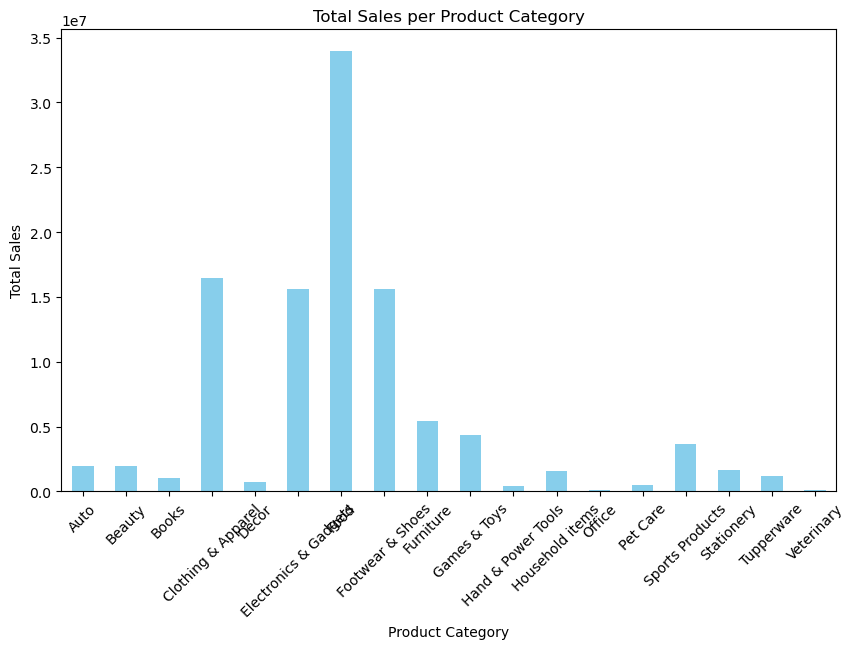

In [105]:
# Bar chart for total sales per product category
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

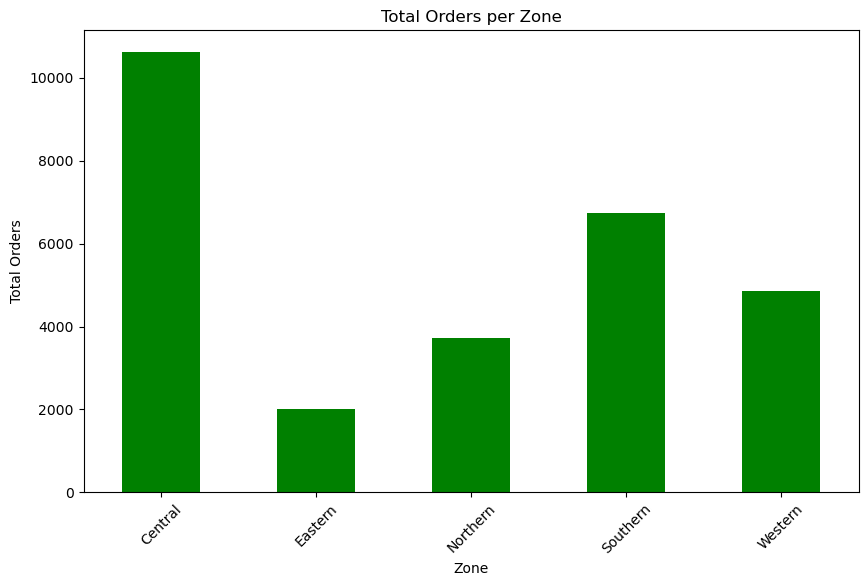

In [109]:
# Bar chart for total orders per zone
plt.figure(figsize=(10, 6))
zone_orders.plot(kind='bar', color='green')
plt.title('Total Orders per Zone')
plt.xlabel('Zone')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()

# Univariate Analysis


Univariate Analysis for Amount:
Mean: 9454.084981746952
Median: 8109.0
Mode: 7907.0
Standard Deviation: 5221.728776053181
Min: 188.0
Max: 23952.0


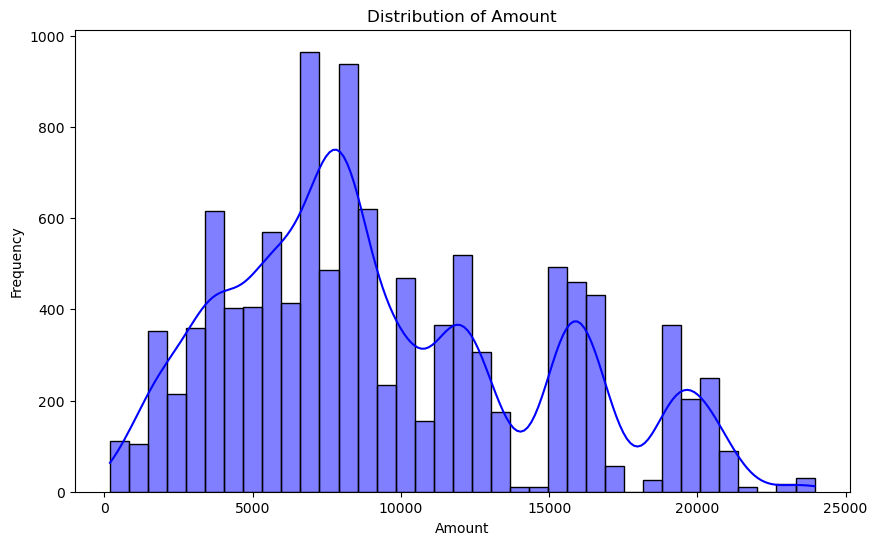

In [184]:
# 1. Numerical Columns (e.g., 'Amount' and 'Orders')
def univariate_numerical(column):
    print(f"\nUnivariate Analysis for {column}:")
    print(f"Mean: {data_cleaned[column].mean()}")
    print(f"Median: {data_cleaned[column].median()}")
    print(f"Mode: {data_cleaned[column].mode()[0]}")
    print(f"Standard Deviation: {data_cleaned[column].std()}")
    print(f"Min: {data_cleaned[column].min()}")
    print(f"Max: {data_cleaned[column].max()}")

    # Distribution plot
    plt.figure(figsize=(10, 6))
    sns.histplot(data_cleaned[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

univariate_numerical('Amount')

Peaks in the KDE curve indicate the most frequent values or the mode of the distribution.

Based on the graph, you can determine whether the 'Amount' data is symmetric or skewed and if there are any outliers or a high concentration around certain values. This helps in understanding the sales distribution pattern.


Univariate Analysis for Orders:
Mean: 2.4890926898762356
Median: 2.0
Mode: 2
Standard Deviation: 1.1148800834976815
Min: 1
Max: 4


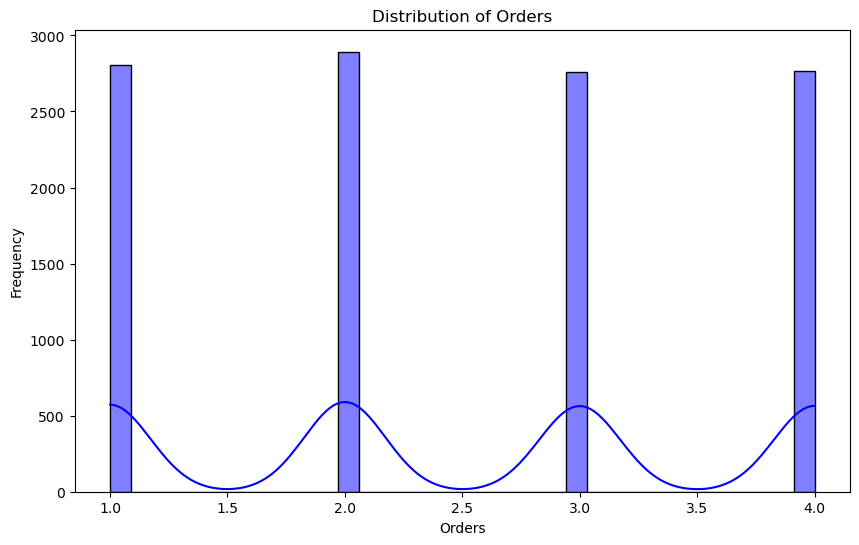

In [186]:
univariate_numerical('Orders')

The KDE provides a continuous estimate of the distribution, making it easier to observe the shape and pattern 
The graph provides a visual summary of how the number of orders varies and their overall distribution within the dataset.


Univariate Analysis for Age:
Mean: 35.411984685246196
Median: 33.0
Mode: 30
Standard Deviation: 12.756116151684957
Min: 12
Max: 92


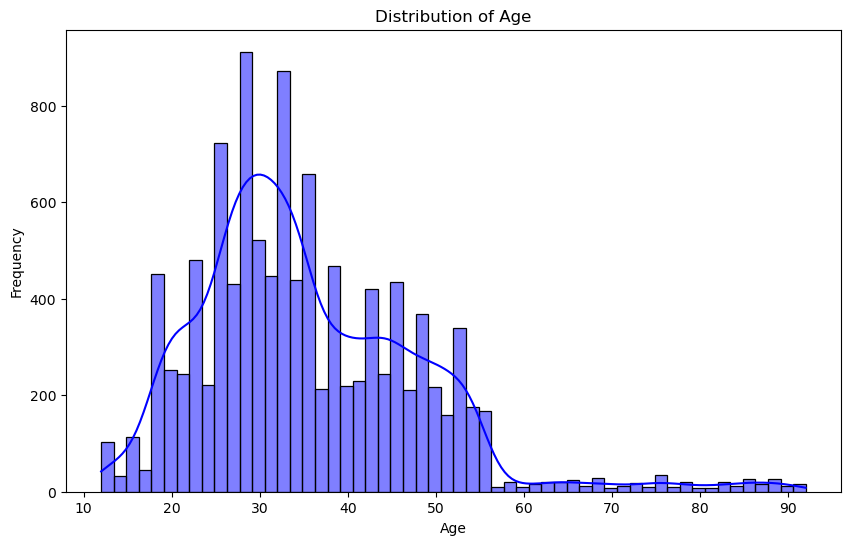

In [123]:
univariate_numerical('Age')

This analysis helps understand the age profile of customers and whether the ages are concentrated within a specific range or spread widely across different age groups.


Univariate Analysis for Gender:
Gender
F    7828
M    3403
Name: count, dtype: int64


C:\Users\dell4\AppData\Local\Temp\ipykernel_31472\4114419066.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_cleaned, palette='viridis')


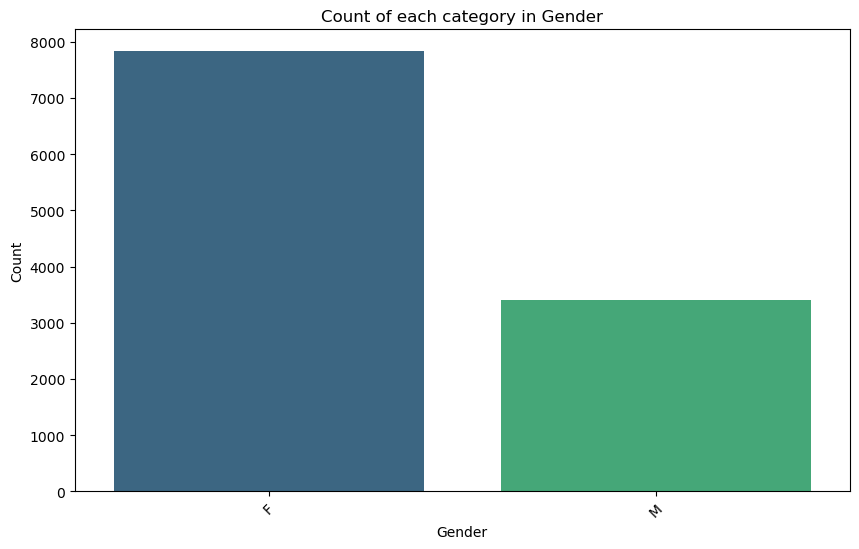

In [117]:
# 2. Categorical Columns (e.g., 'Gender', 'Product_Category', 'Zone')
def univariate_categorical(column):
    print(f"\nUnivariate Analysis for {column}:")
    print(data_cleaned[column].value_counts())

    # Bar plot for categorical data
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data_cleaned, palette='viridis')
    plt.title(f'Count of each category in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

univariate_categorical('Gender')


Univariate Analysis for Product_Category:
Product_Category
Clothing & Apparel       2653
Food                     2490
Electronics & Gadgets    2082
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Decor                      96
Auto                       96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64


C:\Users\dell4\AppData\Local\Temp\ipykernel_31472\4114419066.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_cleaned, palette='viridis')


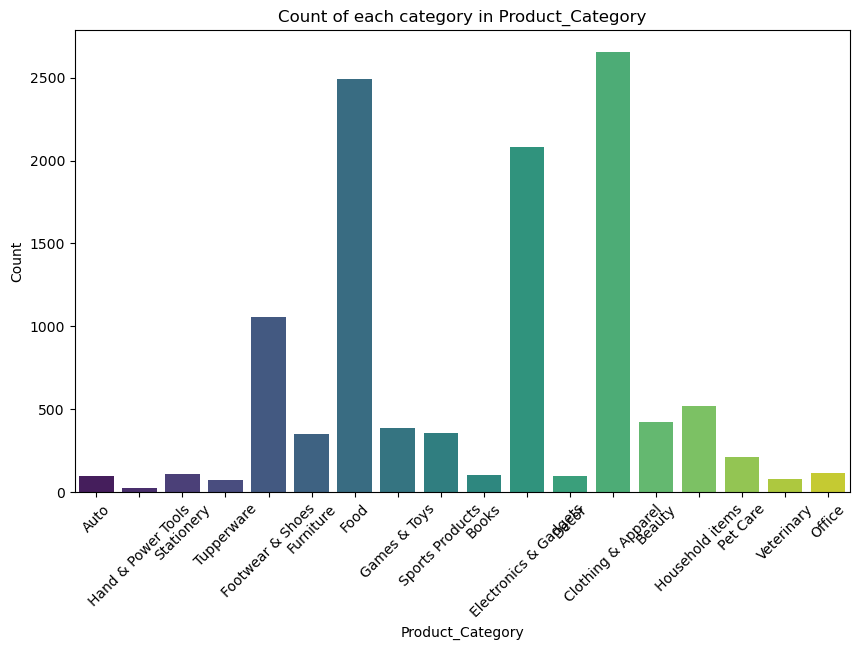

In [119]:
univariate_categorical('Product_Category')


Univariate Analysis for Zone:
Zone
Central     4287
Southern    2693
Western     1948
Northern    1490
Eastern      813
Name: count, dtype: int64


C:\Users\dell4\AppData\Local\Temp\ipykernel_31472\4114419066.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_cleaned, palette='viridis')


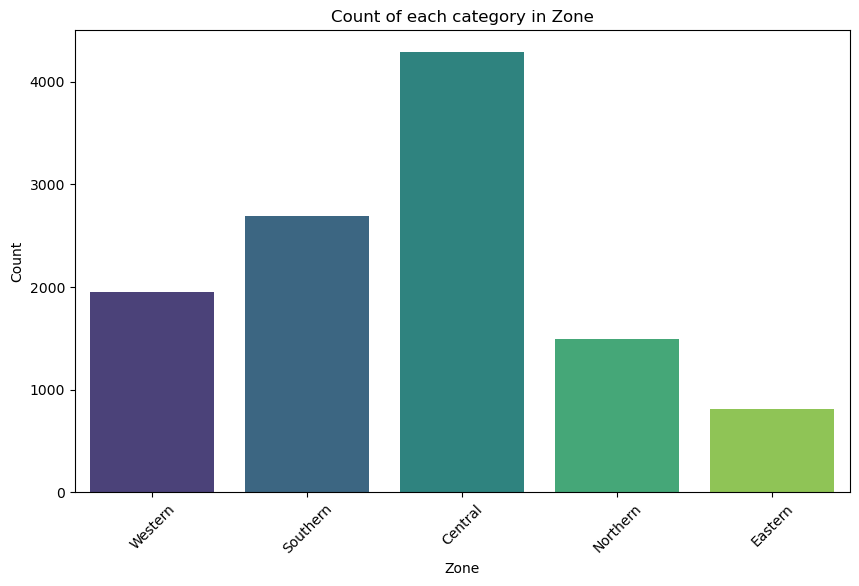

In [121]:
univariate_categorical('Zone')


Univariate Analysis for State:
State
Uttar Pradesh       1942
Maharashtra         1522
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              451
Bihar                433
Gujarat              426
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: count, dtype: int64


C:\Users\dell4\AppData\Local\Temp\ipykernel_31472\4114419066.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_cleaned, palette='viridis')


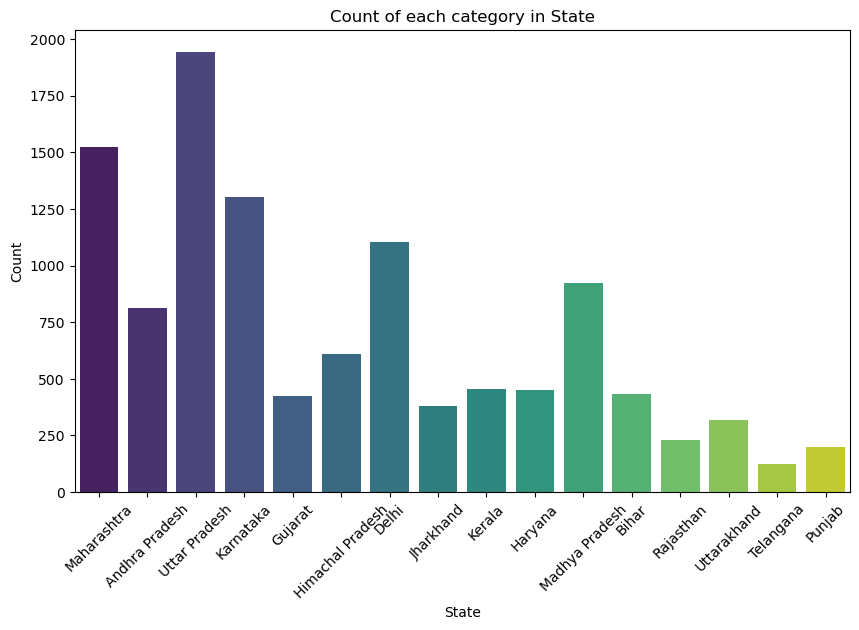

In [190]:
univariate_categorical('State')

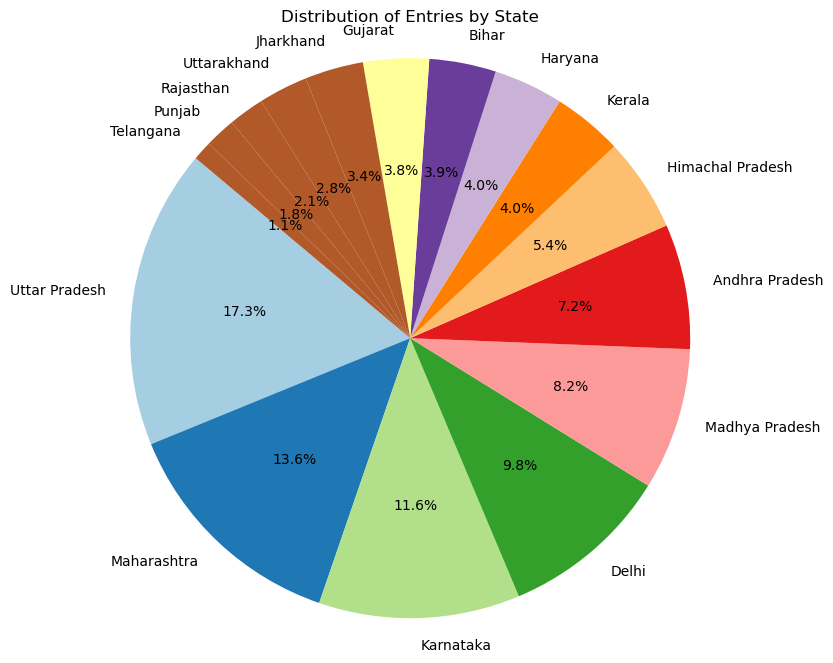

In [188]:
# Count of each state
state_counts = data_cleaned['State'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(state_counts))))
plt.title('Distribution of Entries by State')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()


Univariate Analysis for Marital_Status:
Marital_Status
0    6514
1    4717
Name: count, dtype: int64


C:\Users\dell4\AppData\Local\Temp\ipykernel_31472\4114419066.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_cleaned, palette='viridis')


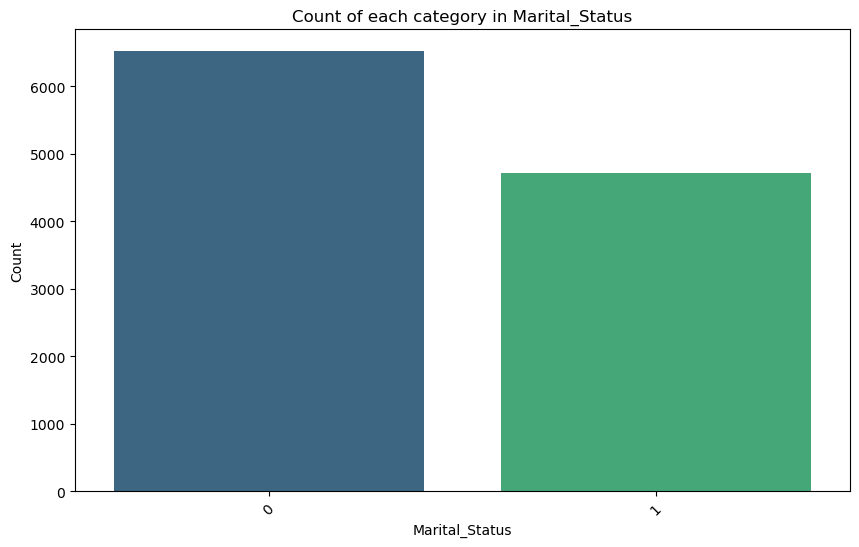

In [127]:
univariate_categorical('Marital_Status')


Univariate Analysis for Occupation:
Occupation
IT Sector          1581
Healthcare         1408
Aviation           1309
Banking            1137
Govt                854
Hospitality         700
Media               637
Automobile          565
Chemical            541
Lawyer              531
Retail              501
Food Processing     423
Construction        413
Textile             349
Agriculture         282
Name: count, dtype: int64


C:\Users\dell4\AppData\Local\Temp\ipykernel_31472\4114419066.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_cleaned, palette='viridis')


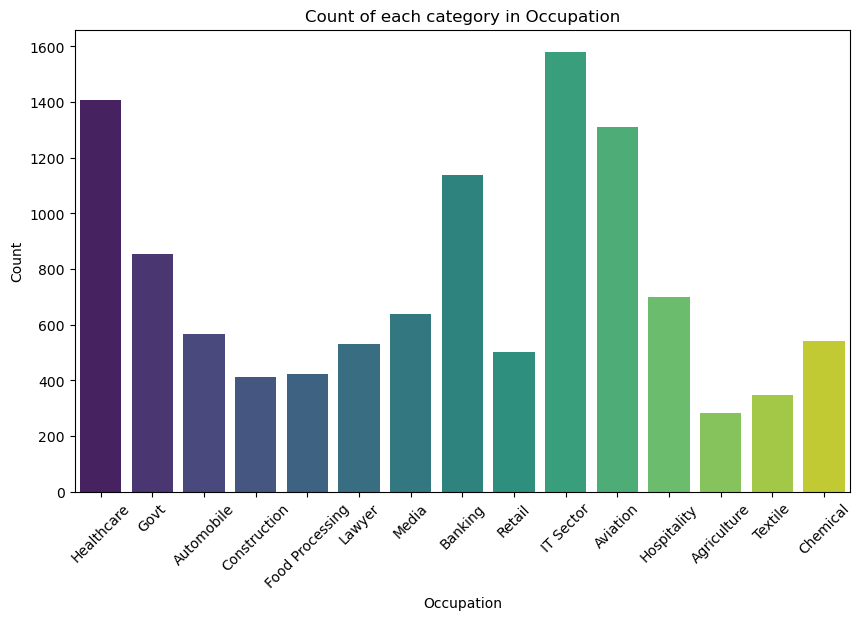

In [129]:
univariate_categorical('Occupation')


Univariate Analysis for Zone:
Zone
Central     4287
Southern    2693
Western     1948
Northern    1490
Eastern      813
Name: count, dtype: int64


C:\Users\dell4\AppData\Local\Temp\ipykernel_31472\4114419066.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_cleaned, palette='viridis')


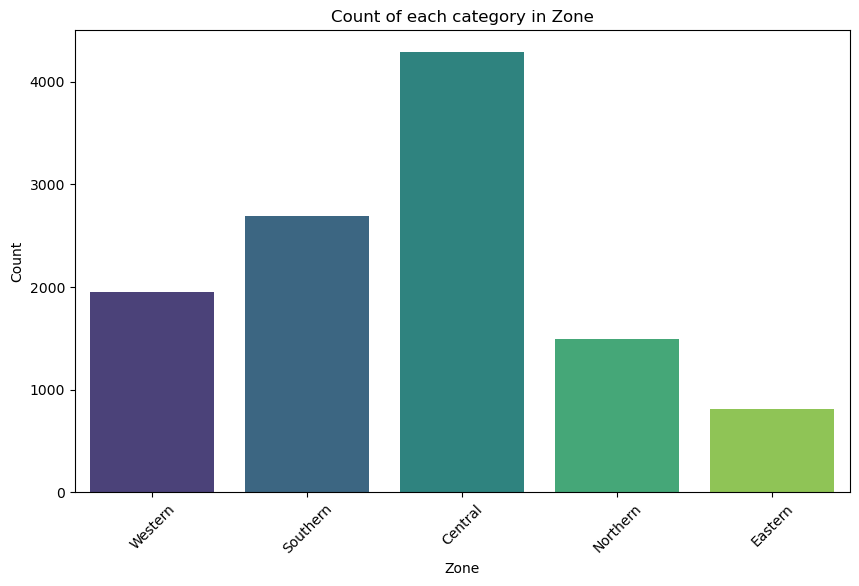

In [131]:
univariate_categorical('Zone')

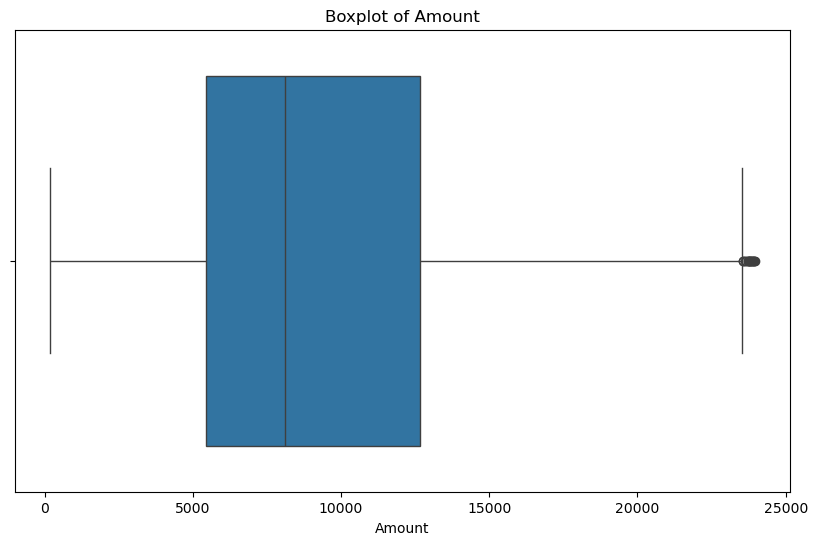

In [192]:
def box_plot(column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

box_plot('Amount')

The box plot provides a quick visual summary of the distribution of 'Amount', highlighting the central tendency, variability, and presence of any extreme values (outliers). This helps identify patterns and anomalies in customer spending behavior.

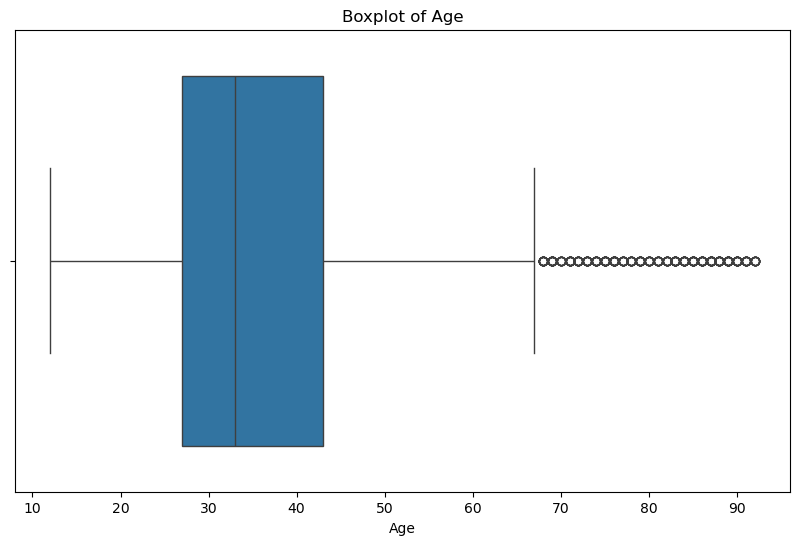

In [194]:
box_plot('Age')

# Bivariate Analysis

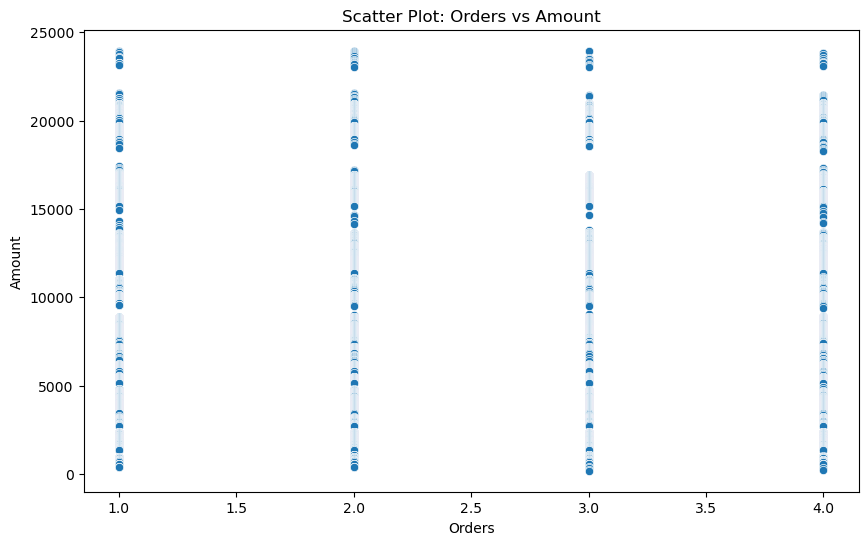

In [136]:
# 1. Numeric vs. Numeric (Scatter plot)
def bivariate_numeric_numeric(col1, col2):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data_cleaned[col1], y=data_cleaned[col2])
    plt.title(f'Scatter Plot: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

bivariate_numeric_numeric('Orders', 'Amount')

The scatter plot allows you to visualize the relationship between the number of orders and the amount spent.

In [138]:
# 2. Numeric vs. Categorical (Box plot)
def bivariate_numeric_categorical(numeric_col, categorical_col):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=categorical_col, y=numeric_col, data=data_cleaned, palette='viridis')
    plt.title(f'Box Plot: {numeric_col} vs {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel(numeric_col)
    plt.xticks(rotation=45)
    plt.show()


C:\Users\dell4\AppData\Local\Temp\ipykernel_31472\1271062568.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_col, y=numeric_col, data=data_cleaned, palette='viridis')


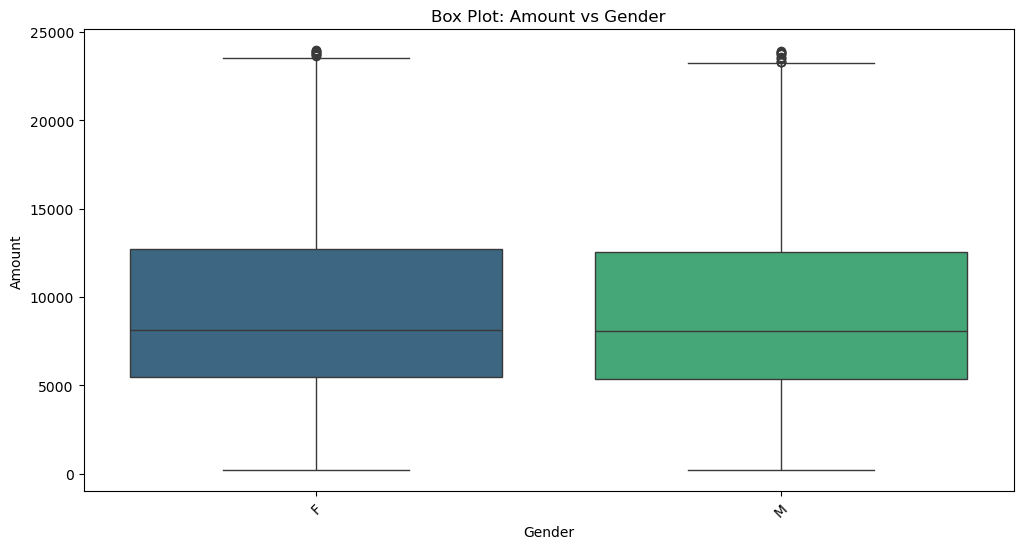

In [142]:
bivariate_numeric_categorical('Amount', 'Gender')

The box plot allows you to compare the distribution and central tendency (median) of the amount spent between genders.

If the boxes or median lines (inside the boxes) differ significantly, it suggests that the spending patterns may vary based on gender.

If one gender has a larger range (longer whiskers or a taller box), it indicates more variability in the amount spent within that group.

Outliers show extreme spending behavior in either gender.

In [144]:
# 3. Categorical vs. Categorical (Crosstab & Heatmap)
def bivariate_categorical_categorical(col1, col2):
    crosstab = pd.crosstab(data_cleaned[col1], data_cleaned[col2])
    print(f"\nCrosstab for {col1} and {col2}:")
    print(crosstab)

    plt.figure(figsize=(10, 6))
    sns.heatmap(crosstab, annot=True, cmap='YlGnBu')
    plt.title(f'Heatmap: {col1} vs {col2}')
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.show()


Crosstab for Gender and Product_Category:
Product_Category  Auto  Beauty  Books  Clothing & Apparel  Decor  \
Gender                                                             
F                   64     325     39                1854     79   
M                   32      97     64                 799     17   

Product_Category  Electronics & Gadgets  Food  Footwear & Shoes  Furniture  \
Gender                                                                       
F                                  1472  1771               782        219   
M                                   610   719               277        133   

Product_Category  Games & Toys  Hand & Power Tools  Household items  Office  \
Gender                                                                        
F                          273                   9              284      75   
M                          113                  17              236      38   

Product_Category  Pet Care  Sports Products  Stationer

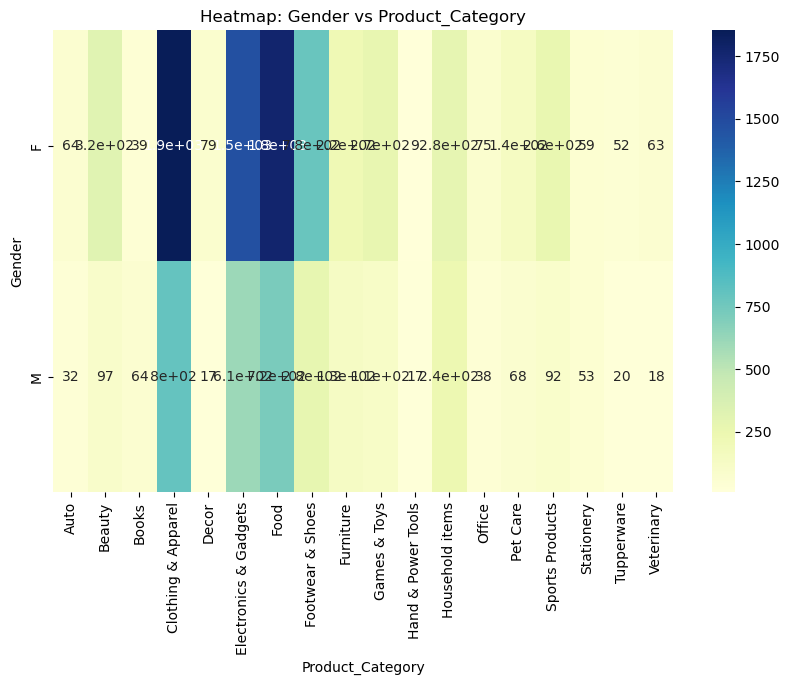

In [146]:
bivariate_categorical_categorical('Gender', 'Product_Category')

This analysis helps in understanding the preferences of different genders for various product categories, which can inform marketing and sales strategies.


Crosstab for Zone and Marital_Status:
Marital_Status     0     1
Zone                      
Central         2478  1809
Eastern          465   348
Northern         869   621
Southern        1542  1151
Western         1160   788


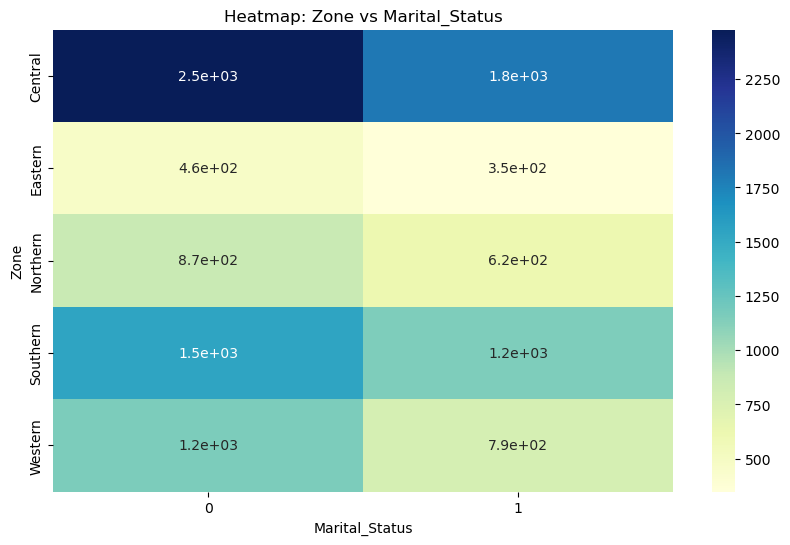

In [148]:
bivariate_categorical_categorical('Zone', 'Marital_Status')

The heatmap helps determine if certain zones have a higher concentration of specific marital statuses, providing insights into demographic patterns by zone. If there are significant differences, this information could be valuable for targeted marketing strategies based on location and marital status.

In [152]:
# 1. Z-Test (Comparing means of 'Amount' between two groups - e.g., Gender)
male_amount = data_cleaned[data_cleaned['Gender'] == 'Male']['Amount']
female_amount = data_cleaned[data_cleaned['Gender'] == 'Female']['Amount']

In [154]:
# Perform Z-Test (only if sample size > 30 for each group)
if len(male_amount) > 30 and len(female_amount) > 30:
    z_stat, z_p_value = stats.ttest_ind(male_amount, female_amount)
    print("\nZ-Test Result for Amount by Gender:")
    print(f"Z-Statistic: {z_stat}, P-Value: {z_p_value}")
else:
    print("Sample size too small for Z-test. Consider using T-test instead.")

Sample size too small for Z-test. Consider using T-test instead.


In [156]:
# 2. T-Test (for smaller samples or when population variance is unknown)
t_stat, t_p_value = stats.ttest_ind(male_amount, female_amount, equal_var=False)
print("\nT-Test Result for Amount by Gender:")
print(f"T-Statistic: {t_stat}, P-Value: {t_p_value}")


T-Test Result for Amount by Gender:
T-Statistic: nan, P-Value: nan


In [160]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
# 3. One-Way ANOVA (Comparing 'Amount' across different product categories)
anova_result = ols('Amount ~ C(Product_Category)', data=data_cleaned).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)
print("\nANOVA Test Result for Amount by Product Category:")
print(anova_table)


ANOVA Test Result for Amount by Product Category:
                           sum_sq       df            F  PR(>F)
C(Product_Category)  1.975560e+11     17.0  1199.357581     0.0
Residual             1.086462e+11  11213.0          NaN     NaN


Since the p-value is significantly less than 0.05, we conclude that there is a statistically significant difference in the mean sales amount ('Amount') across different product categories. This suggests that the amount spent varies depending on the product category, indicating that product type likely influences the sales amount.

C:\Users\dell4\AppData\Local\Temp\ipykernel_31472\1271062568.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_col, y=numeric_col, data=data_cleaned, palette='viridis')


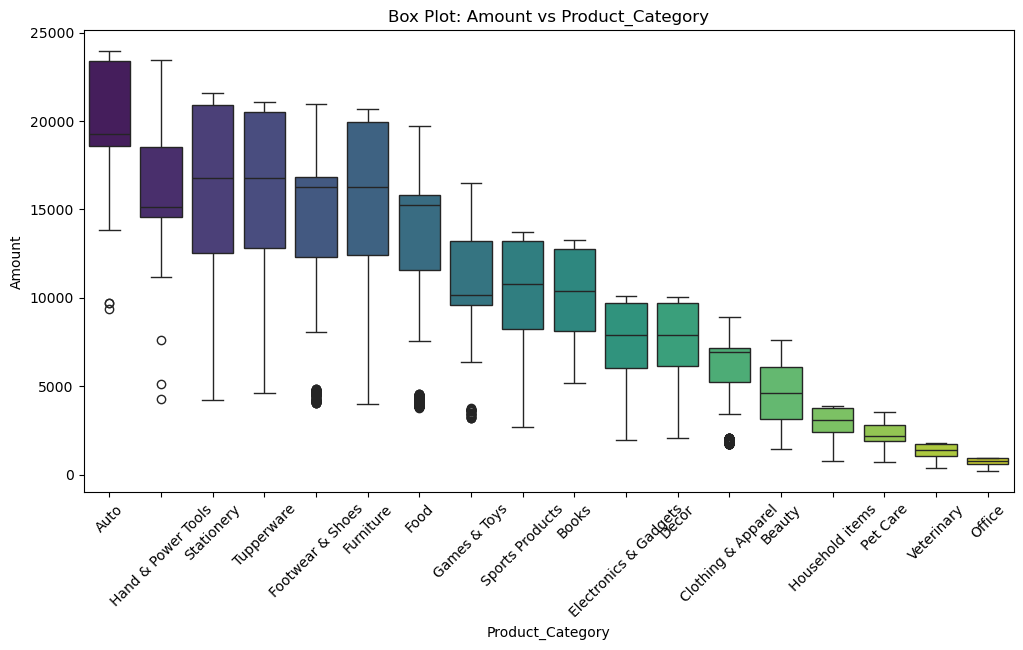

In [140]:
bivariate_numeric_categorical('Amount', 'Product_Category')

In [162]:
# 4. Chi-Square Test (for independence between two categorical variables, e.g., Gender and Product_Category)
contingency_table = pd.crosstab(data_cleaned['Gender'], data_cleaned['Product_Category'])
chi2, chi2_p, dof, expected = stats.chi2_contingency(contingency_table)
print("\nChi-Square Test Result for Gender and Product Category:")
print(f"Chi-Square Statistic: {chi2}, P-Value: {chi2_p}")


Chi-Square Test Result for Gender and Product Category:
Chi-Square Statistic: 182.82827646583647, P-Value: 7.87912213196654e-30


Since the p-value is extremely small, we reject the null hypothesis, concluding that there is a statistically significant association between 'Gender' and 'Product_Category'. In other words, the distribution of product categories differs based on gender.